In [1]:
import sys
sys.path.remove('/Users/cmueller/Library/Python/2.7/lib/python/site-packages')

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import poisson,skellam

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import math
import xgboost as xgb
#import scikitplot as skplt
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn import preprocessing
import statsmodels.api as sm
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

## import GPS data

In [121]:
gps_df = pd.read_csv("/Users/cmueller/Desktop/vivace/current.csv")
old_sails_df = pd.read_csv('/Users/cmueller/Desktop/vivace/archive.csv')
#gps_df.dropna(inplace=True)
gps_df.info()
old_sails_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8923 entries, 0 to 8922
Data columns (total 13 columns):
type                      8923 non-null object
time                      8923 non-null object
latitude                  8923 non-null float64
longitude                 8923 non-null float64
altitude (ft)             8923 non-null float64
speed (kt)                8914 non-null float64
course                    8914 non-null float64
distance (nmi)            8923 non-null float64
distance_interval (ft)    8922 non-null float64
eos                       8 non-null float64
color                     1 non-null object
name                      1 non-null object
desc                      0 non-null float64
dtypes: float64(9), object(4)
memory usage: 906.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34784 entries, 0 to 34783
Data columns (total 13 columns):
type                      34784 non-null object
time                      34784 non-null object
latitude                  

In [122]:
gps_df['datetime'] = pd.to_datetime(gps_df.time)
old_sails_df['datetime'] = pd.to_datetime(old_sails_df['time'],errors='coerce')

#gps_df['local_time'] = gps_df.datetime - pd.Timedelta(hours=5)
#old_sails_df.colu
oldsails_speet = old_sails_df['speed (kt)'].astype('float64',errors='ignore').dropna()
#data['Start Date']= pd.to_datetime(data['Start Date'], dayfirst=True, errors='coerce')

In [109]:
old_sails_df = old_sails_df[old_sails_df['datetime'] > '2017-08-25 15:03:14' ]

In [123]:
old_sails_speed = old_sails_df['speed (kt)'].apply(lambda x: pd.to_numeric(x, errors='coerce')).dropna()
old_sails_df['speed_kt'] = old_sails_df['speed (kt)'].apply(lambda x: pd.to_numeric(x, errors='coerce'))

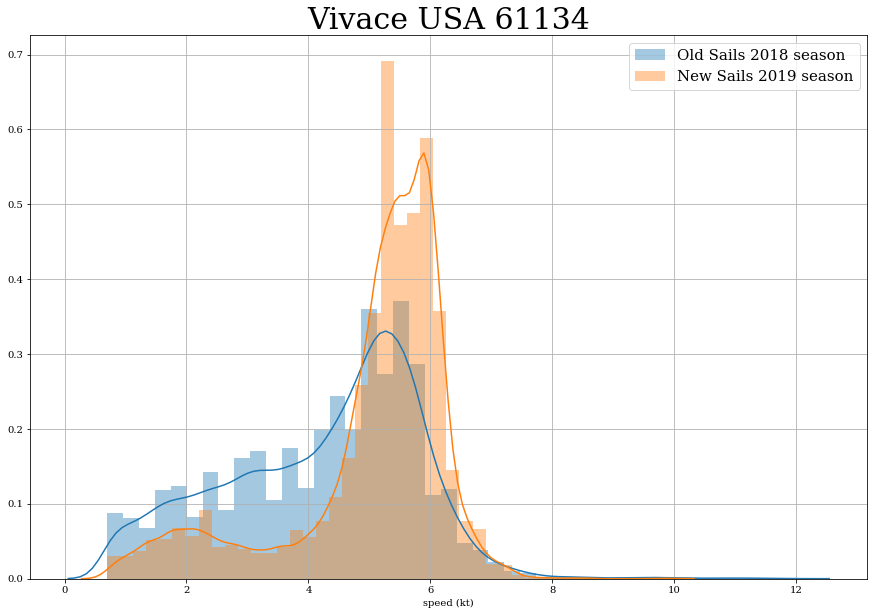

In [141]:
make_hist(gps_df[(gps_df['speed (kt)'] > .6)]['speed (kt)'].dropna(),old_sails_df[(old_sails_df['speed_kt'] < 12) & (old_sails_df['speed_kt'] > .6)]['speed_kt'],'New Sails 2019 season','Old Sails 2018 season')


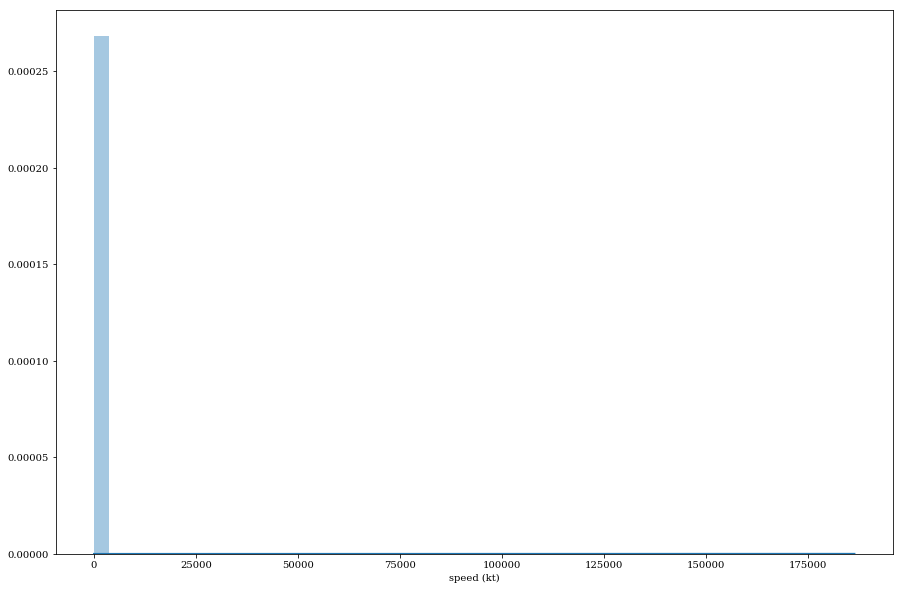

In [91]:
f,ax = plt.subplots(figsize=(15,10))
#sns.distplot(gps_df['speed (kt)'].dropna())
sns.distplot(old_sails_speed)

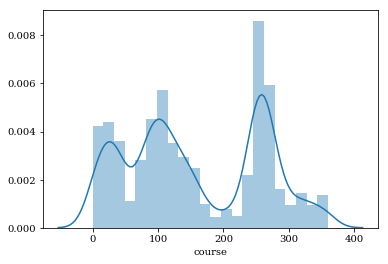

In [37]:
sns.distplot(gps_df['course'].dropna())

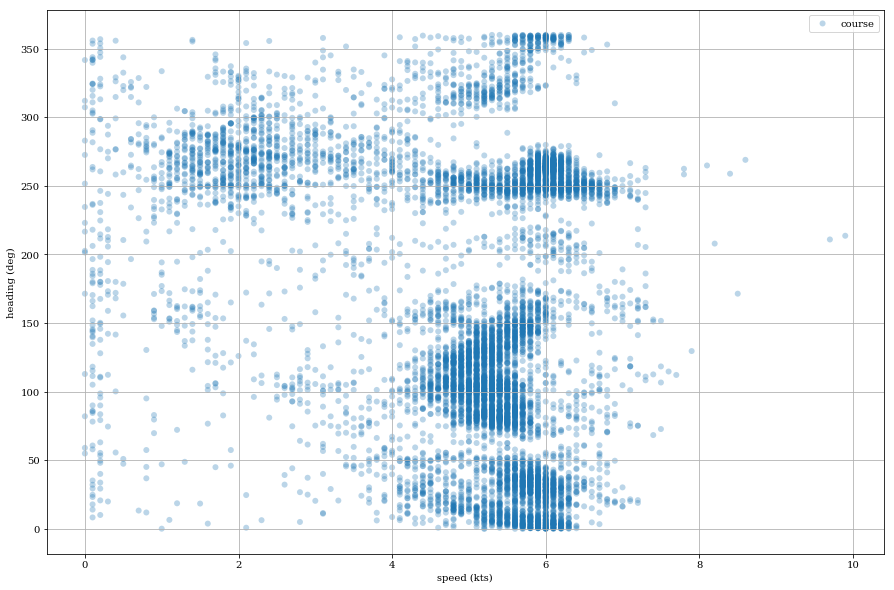

In [35]:
make_scatter(gps_df['speed (kt)'].dropna(),gps_df['course'].dropna(),'speed (kts)','heading (deg)')

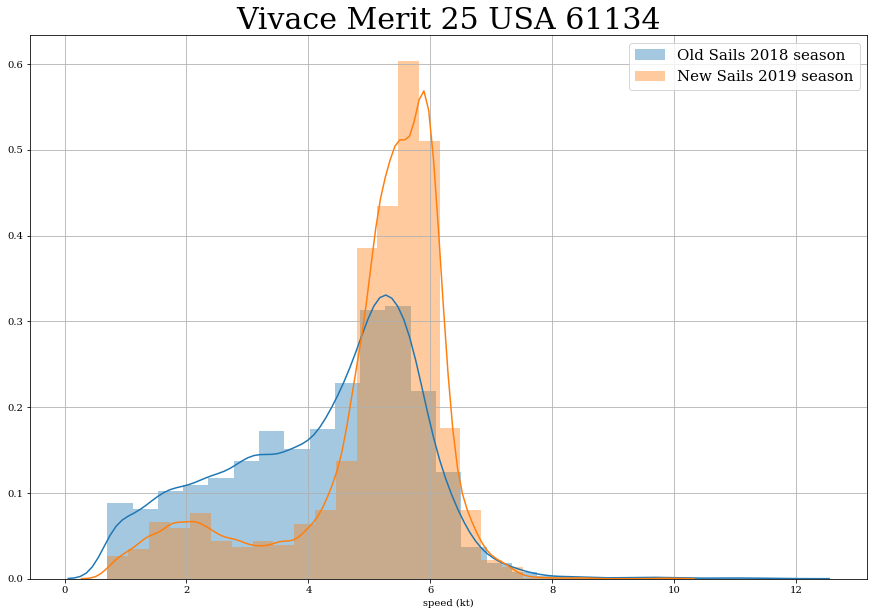

In [158]:
def make_hist(data1,data2,label1,label2):
    plt.rc('font', family='serif')
    f,ax = plt.subplots(figsize=(15,10))
    nbins = 27
#    sns.distplot(data1,bins = nbins, label = label1)
    sns.distplot(data2,bins = nbins, label = label2)
    sns.distplot(data1,bins = nbins, label = label1)
    plt.legend()
    plt.grid()
    #ax.tick_params('x',labelsize=20)
    plt.title('Vivace Merit 25 USA 61134',fontsize=30)
    plt.legend(loc='best',fontsize=15)
    plt.show()

def make_scatter(x,y):
    plt.rc('font', family='serif')
    f,ax = plt.subplots(figsize=(15,10))
    color 
    ax.scatter(x, y, alpha=0.3, edgecolors='none')
    plt.legend()
    plt.grid()
    #ax.tick_params('x',labelsize=20)
    #plt.title('corners',fontsize=30)
    plt.legend(loc='best',fontsize=10)
    plt.show()
make_hist(gps_df[(gps_df['speed (kt)'] > .6)]['speed (kt)'].dropna(),old_sails_df[(old_sails_df['speed_kt'] < 12) & (old_sails_df['speed_kt'] > .6)]['speed_kt'],'New Sails 2019 season','Old Sails 2018 season')

#make_hist(jd['team_a_corners'],jd['team_b_corners'],'team_a_corners','team_b_corners')
#make_hist(winning_corners,losing_corners,'winning_corners','losing_corners')
#make_hist(winning_corners_a,losing_corners_b,'winningAndHome_corners','losingAndAway_corners')
#make_hist(losing_corners_a,winning_corners_b,'losingAndHome_corners','winningAndAway_corners')
#make_hist(team_a_efficiency.replace([np.inf, -np.inf], np.nan),team_b_efficiency.replace([np.inf, -np.inf], np.nan),'home team shots on tar/ps','away team shots on tar/ps')

In [64]:
def make_scatter(x,y,xlabel,ylabel):
    plt.rc('font', family='serif')
    f,ax = plt.subplots(figsize=(15,10))
    ax.scatter(x, y, alpha=0.3, edgecolors='none')
    plt.legend()
    plt.grid()
    #ax.tick_params('x',labelsize=20)
    #plt.title('corners',fontsize=30)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.legend(loc='best',fontsize=10)
    plt.show()
    
#make_scatter(jd.team_a_shots, jd.team_a_corners,'home team shots','home team corners')
#make_scatter(jd.team_b_shots, jd.team_b_corners,'away team shots','away team corners')

#make_scatter(jd.team_a_shots, jd.team_b_corners,'home team shots','away team corners')
#make_scatter(jd.team_b_shots, jd.team_a_corners,'away team shots','home team corners')

#make_scatter(jd.team_a_shots, jd.team_b_shots,'home team shots','away team shots')
#make_scatter(jd.team_a_corners, jd.team_b_corners,'home team corners','away team corners')
#make_scatter(jd.team_a_possession, jd.team_a_corners,'home team pos','home team corners')
#make_scatter(jd.team_b_possession, jd.team_b_corners,'away team pos','away team corners')
#make_scatter(jd.team_a_possession, jd.team_a_shots,'home team pos','home team shots')
#make_scatter(jd.team_b_possession, jd.team_b_shots,'away team pos','away team shots')


## make home away poisson plots

In [186]:
def home_away_plot(epl_1617,home_team,away_team):
    fig,(ax1,ax2) = plt.subplots(2, 1)


    chel_home = epl_1617[epl_1617['home_name']==home_team][['team_a_corners']].apply(pd.value_counts,normalize=True)
    chel_home_pois = [poisson.pmf(i,np.sum(np.multiply(chel_home.values.T,chel_home.index.T),axis=1)[0]) for i in range(15)]
    sun_home = epl_1617[epl_1617['home_name']==away_team][['team_a_corners']].apply(pd.value_counts,normalize=True)
    sun_home_pois = [poisson.pmf(i,np.sum(np.multiply(sun_home.values.T,sun_home.index.T),axis=1)[0]) for i in range(15)]

    chel_away = epl_1617[epl_1617['away_name']==home_team][['team_b_corners']].apply(pd.value_counts,normalize=True)
    chel_away_pois = [poisson.pmf(i,np.sum(np.multiply(chel_away.values.T,chel_away.index.T),axis=1)[0]) for i in range(15)]
    sun_away = epl_1617[epl_1617['away_name']==away_team][['team_b_corners']].apply(pd.value_counts,normalize=True)
    sun_away_pois = [poisson.pmf(i,np.sum(np.multiply(sun_away.values.T,sun_away.index.T),axis=1)[0]) for i in range(15)]

    print(chel_home.index)
    print(chel_home.index-0.4)
    print(chel_home.values)
    ax1.bar(chel_home.index-0.4,np.vectorize(chel_home.values),width=0.4,label=home_team)
    ax1.bar(chel_home.index-0.4,chel_home.values,width=0.4,color="#034694",linewidth=.5,label=home_team)

    ax1.bar(sun_home.index,sun_home.values,width=0.4,color="#EB172B",label=away_team)
    pois1, = ax1.plot([i for i in range(15)], chel_home_pois,linestyle='-', marker='o',label=home_team, color = "#0a7bff")
    pois1, = ax1.plot([i for i in range(15)], sun_home_pois,linestyle='-', marker='o',label=away_team, color = "#ff7c89")
    leg=ax1.legend(loc='upper right', fontsize=12, ncol=2)
    leg.set_title("Poisson                 Actual                ", prop = {'size':'14', 'weight':'bold'})
    ax1.set_xlim([-0.5,7.5])
    ax1.set_ylim([-0.01,0.65])
    ax1.set_xticklabels([])
    # mimicing the facet plots in ggplot2 with a bit of a hack
    ax1.text(7.65, 0.585, '                Home                ', rotation=-90,
        bbox={'facecolor':'#ffbcf6', 'alpha':0.5, 'pad':5})
    ax2.text(7.65, 0.585, '                Away                ', rotation=-90,
        bbox={'facecolor':'#ffbcf6', 'alpha':0.5, 'pad':5})

    ax2.bar(chel_away.index-0.4,chel_away.values,width=0.4,color="#034694",label=home_team)
    ax2.bar(sun_away.index,sun_away.values,width=0.4,color="#EB172B",label=away_team)
    pois1, = ax2.plot([i for i in range(15)], chel_away_pois, linestyle='-', marker='o',label=home_team, color = "#0a7bff")
    pois1, = ax2.plot([i for i in range(15)], sun_away_pois, linestyle='-', marker='o',label=away_team, color = "#ff7c89")
    ax2.set_xlim([-0.5,7.5])
    ax2.set_ylim([-0.01,0.65])
    ax1.set_title("Number of Corners per Match",size=14,fontweight='bold')
    ax2.set_xlabel("Corners per Match",size=13)
    ax2.text(-1.15, 0.9, 'Proportion of Matches', rotation=90, size=13)
    plt.tight_layout()
    plt.show()